In [100]:
# Imports
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [77]:
df_ca = pd.read_pickle("../data/clean_data/CA_full_data_AI_col.pkl")
df_lol = pd.read_pickle("../data/clean_data/LoL_full_data_AI_col.pkl")

In [84]:
# grouping
df_ca_grouped = df_ca.groupby("PY")["AI"].value_counts(normalize=True).mul(100).unstack(1)
df_lol_grouped = df_lol.groupby("PY")["AI"].value_counts(normalize=True).mul(100).unstack(1)

In [85]:
# merging the two df
df_merged = pd.concat([df_ca_grouped, df_lol_grouped], axis=1)
# renaming and keeping only AI= True 
df_merged.columns.values[1] = "CA"
df_merged.columns.values[3] = "LOL"

df_merged

AI,False,CA,False,LOL
PY,,,,
2010.0,99.235569,0.764431,99.145821,0.854179
2011.0,99.197263,0.802737,98.905010,1.094990
2012.0,99.170270,0.829730,99.170124,0.829876
2013.0,99.057246,0.942754,99.158920,0.841080
2014.0,99.125982,0.874018,99.165649,0.834351
2015.0,98.974008,1.025992,98.796373,1.203627
2016.0,98.868500,1.131500,99.045856,0.954144
2017.0,98.753772,1.246228,98.874536,1.125464
2018.0,98.419710,1.580290,98.415842,1.584158


In [86]:
#dropping False columns
df_merged = df_merged[["CA", "LOL"]]
df_merged

AI,CA,LOL
PY,,
2010.0,0.764431,0.854179
2011.0,0.802737,1.094990
2012.0,0.829730,0.829876
2013.0,0.942754,0.841080
2014.0,0.874018,0.834351
2015.0,1.025992,1.203627
2016.0,1.131500,0.954144
2017.0,1.246228,1.125464
2018.0,1.580290,1.584158


In [122]:
# melting to plot in seaborn
data = pd.melt(df_merged, var_name="SDG", value_name="Percentage", ignore_index=False)
# rounding index
data.index = data.index.to_series().apply(lambda x:round(x))
data

,SDG,Percentage
PY,,
2010,CA,0.764431
2011,CA,0.802737
2012,CA,0.829730
2013,CA,0.942754
2014,CA,0.874018
2015,CA,1.025992
2016,CA,1.131500
2017,CA,1.246228
2018,CA,1.580290


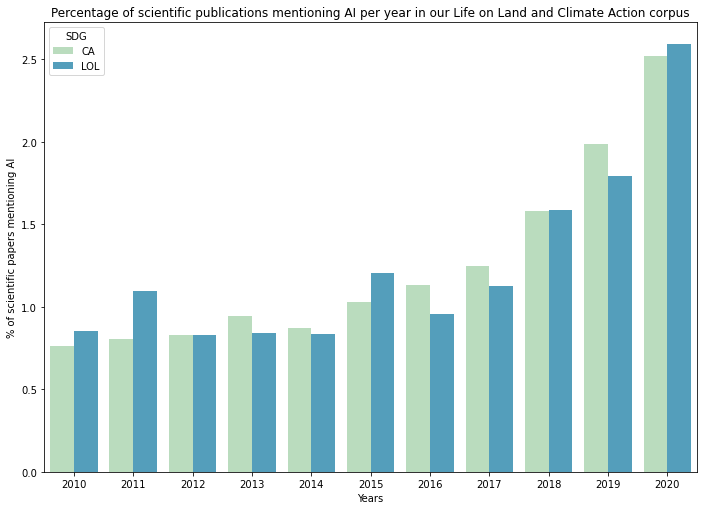

In [138]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.barplot(data=data, x=data.index, y="Percentage", hue="SDG", palette = sns.color_palette("GnBu", 2))
g.set(xlabel="Years", ylabel="% of scientific papers mentioning AI")
g.set_title('Percentage of scientific publications mentioning AI per year in our Life on Land and Climate Action corpus')
fig.savefig("../img/CAvsAI.png")